# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [21]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [22]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [23]:
spaceship_clean = spaceship.dropna()
spaceship_clean = spaceship_clean.drop(['PassengerId', 'Name'], axis=1)
spaceship_clean['Cabin'] = spaceship_clean['Cabin'].str[0]

spaceship_clean = pd.get_dummies(spaceship_clean, drop_first=True)


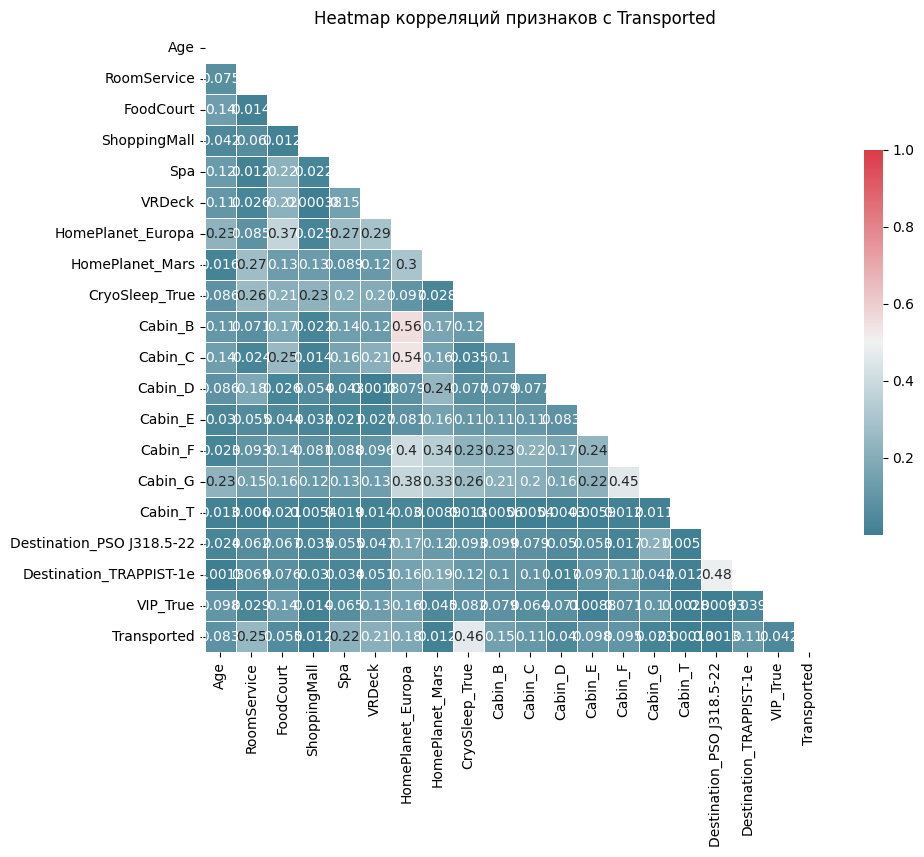

Отобранные признаки: ['RoomService', 'Spa', 'VRDeck', 'HomePlanet_Europa', 'CryoSleep_True', 'Cabin_B', 'Cabin_C', 'Destination_TRAPPIST-1e']


In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Добавляем таргет в датафрейм с признаками (пример df_cali = X + y)
df_cali = X.copy()
df_cali['Transported'] = y.astype(int)  # булевый к int (0/1)

corr = df_cali.corr().abs()  # модуль корреляции

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, vmax=1, square=True, linewidths=.5,
            cbar_kws={"shrink": .5}, annot=True, cmap=cmap)

plt.title('Heatmap корреляций признаков с Transported')
plt.show()

# Выбор признаков с корреляцией по таргету выше порога, например 0.1
corr_target = corr['Transported']
selected_features = corr_target[corr_target > 0.1].index.drop('Transported')

print("Отобранные признаки:", list(selected_features))


In [25]:
selected_features = [
    'CryoSleep_True', 'HomePlanet_Europa', 'Destination_TRAPPIST-1e', 
    'Spa', 'VRDeck', 'Cabin_B', 'Cabin_D', 'Cabin_E', 'Age', 'RoomService'
]
spaceship_clean = spaceship_clean[selected_features + ['Transported']]

- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [26]:

categorical_cols = spaceship_clean.select_dtypes(include='object').columns
spaceship_clean = pd.get_dummies(spaceship_clean, columns=categorical_cols, drop_first=True)


X = spaceship_clean.drop(columns=['Transported'])
y = spaceship_clean['Transported']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

In [27]:
print(spaceship_clean.columns.tolist())

['CryoSleep_True', 'HomePlanet_Europa', 'Destination_TRAPPIST-1e', 'Spa', 'VRDeck', 'Cabin_B', 'Cabin_D', 'Cabin_E', 'Age', 'RoomService', 'Transported']


- Evaluate your model

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

forest = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10)
forest.fit(X_train_std, y_train)

pred = forest.predict(X_test_std)

print("Accuracy:", accuracy_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

Accuracy: 0.7829046898638427
F1 Score: 0.7885040530582167

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.76      0.78       661
        True       0.77      0.81      0.79       661

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322



**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [None, 10, 20, 30],        # Maximum depth of tree
    'min_samples_split': [2, 5, 10],        # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]           # Min samples at a leaf node
}

- Run Grid Search

In [33]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_std, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


- Evaluate your model

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Предсказания на тестовой выборке
y_pred = best_model.predict(X_test_std)

# Оценка
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7829046898638427
Confusion Matrix:
 [[500 161]
 [126 535]]
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.76      0.78       661
        True       0.77      0.81      0.79       661

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322



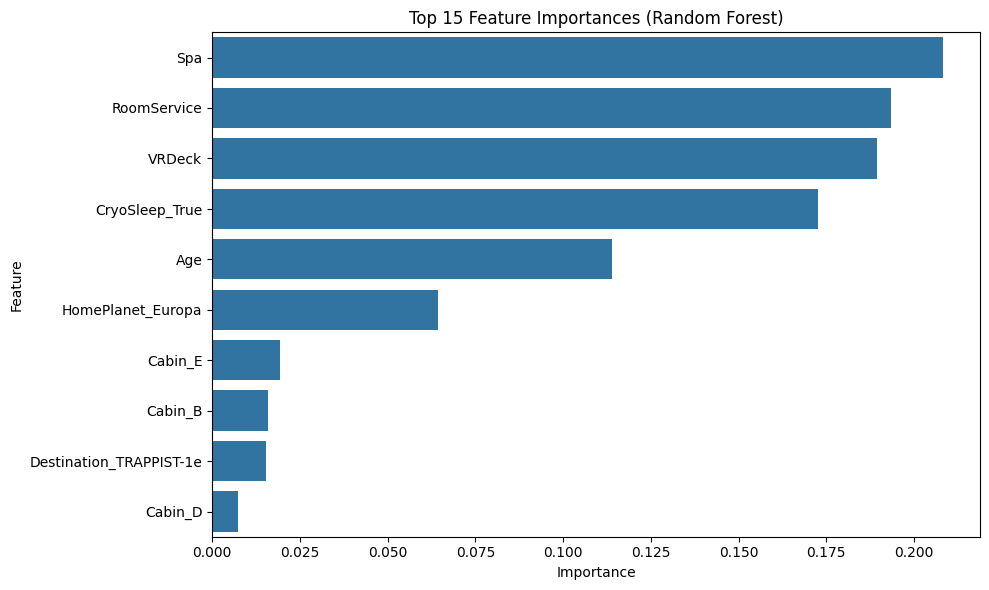

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Получаем важность признаков
importances = best_model.feature_importances_
feature_names = X_train.columns

# В датафрейм
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()
